# Analyzing CIA Factbook Data

In this project, I work with data from CIA World Factbook, a compendium of statistics about all of the countries on earth. In this project, I use Python and SQLite to explore, analyze, and visualize data from this database.

In [1]:
# Begin by importing sqlite3 and pandas
import sqlite3
import pandas as pd

# Establish a connection to the database
conn = sqlite3.connect('factbook.db')

# Write a query to return information about the tables in the database
q = "select * from sqlite_master where type='table'"
# Use pandas to return formatted results
pd.read_sql_query(q,conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [2]:
# Return the first five rows of the facts table
q = "select * from facts limit 5"
pd.read_sql_query(q, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [3]:
# Explore the population and population growth columns
q = "select min(population), max(population), min(population_growth), max(population_growth) from facts"
pd.read_sql_query(q,conn)

,min(population),max(population),min(population_growth),max(population_growth)
0,0,7256490011,0.0,4.02


These results show that there is a country with a population of zero and another country with a population of more than 7.2 billion people. Let's explore these further.

In [4]:
q = "select * from facts where population = 0"
pd.read_sql_query(q,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [12]:
q = "select * from facts \
where population = (select max(population) from facts)"
pd.read_sql_query(q,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


Predictably, the population of over 7.2 billion people is that of the world. The country with a population of 0 is Antarctica, which is interesting since Wikipedia states that this continent has a population of 1106. Wikipedia also states that "[a]nywhere from 1,000 to 5,000 people reside throughout the year at research stations scattered across the continent." Therefore, perhaps Antarctica simply has no permanent residents. 

## Visualizing the Data

Omitting the two outliers explored above, let's continue to explore this data by creating histograms for the population data.

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f29d60c39b0>,
      dtype=object)

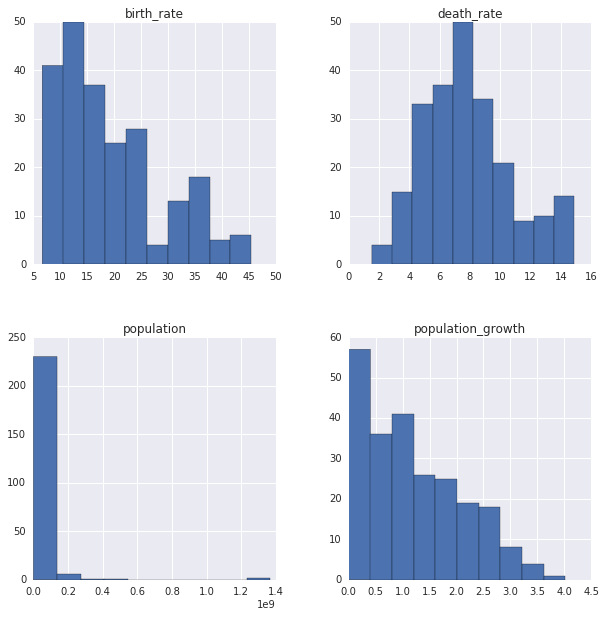

In [17]:
# Import matplotlib and seaborn and run Jupyter magic for matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Write a query to exclude the world and Antarctica rows and return the columns with population data
q = "select population, population_growth, birth_rate, death_rate \
from facts where population != (select min(population) from facts) \
and population != (select max(population) from facts);"

# Create a figure
fig, ax = plt.subplots(figsize=(10,10))
pd.read_sql_query(q,conn).hist(ax=ax)

## Population Density

Next, let's explore population density, which is the ratio of population to land area. 

In [20]:
# Create a query that gives the population density 
# and returns the 10 countries with the highest population density
q = "select name as Country, population / area_land as Population_Density \
from facts order by Population_Density desc limit 10"
pd.read_sql_query(q,conn)

,Country,Population_Density
0,Macau,21168
1,Monaco,15267
2,Singapore,8259
3,Hong Kong,6655
4,Gaza Strip,5191
5,Gibraltar,4876
6,Bahrain,1771
7,Maldives,1319
8,Malta,1310
9,Bermuda,1299


Comparing these results to those from Wikipedia, the top 4 are all the same. However, the Gaza Strip is not included in the Wikipedia table, and the Vatican doesn't seem to be included in the database. Exlcuding these, both Wikipedia and the above results are in agreement on the next two countries, i.e., Gibraltar and Bahrain. However, the two tables disagree on the order for the remaining top ten. Wikipedia places the Maldives after Malta, Bermuda, and Sint Maarten, whereas Sint Maarten didn't make the top ten list here.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f29d5da2cf8>],
      dtype=object)

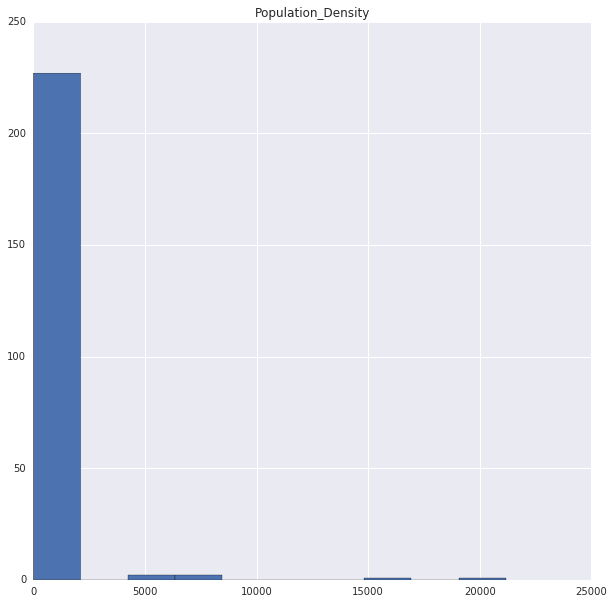

In [22]:
# Create a histogram of population density
q = "select population / area_land as Population_Density from facts"
fig, ax = plt.subplots(figsize=(10,10))
pd.read_sql_query(q,conn).hist(ax=ax)

## Ratio of water to land

Next, let's see which countries have the highest ratios of water to land. 

In [25]:
q = "select name as Country, \
cast(area_water as float) / area_land as Water_Land_Ratio from facts \
order by Water_Land_Ratio desc limit 10"
pd.read_sql_query(q,conn)

,Country,Water_Land_Ratio
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
2,Puerto Rico,0.554791
3,"Bahamas, The",0.386613
4,Guinea-Bissau,0.284673
5,Malawi,0.259396
6,Netherlands,0.225710
7,Uganda,0.222922
8,Eritrea,0.164356
9,Liberia,0.156240


The above results show that the British Indian Ocean Territory has far and away the highest ratio of water area to land area. According to Wikipedia, this territory contains over 1,000 individual islands, most of which are very small. This territory is 99.89% water, making it by far the country with the highest water-to-land ratio.

The country with the second highest water-to-land ratio is the Virgin Islands. However, the Virgin Islands have a water-to-land ratio of only 4.5, which is tiny compared to that of the British Indian Ocean Territory at 905. 

These two island countries are the only ones that have more water than land. All of the other countries on the above table have water-to-land ratios of less 0.6.